In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")


In [63]:
import pandas as pd
import numpy as np

# Visualization (optional but useful for insights)
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [64]:
data=pd.read_csv('anime.csv')
df=data.copy()

In [65]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [66]:
df.head(30)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [68]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

The dataset contains 12,294 anime records with attributes such as genre, type, episodes, rating, and member count. Some attributes contain missing values which must be handled before similarity computation.

In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [71]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [72]:
for i in df.columns:
    print(f" \n col name is :    {i}")
    print(f" \n col unique are :    {df[i].unique()}")
    print(f" \n col  dtype  is :    {df[i].dtype}")

 
 col name is :    anime_id
 
 col unique are :    [32281  5114 28977 ...  5621  6133 26081]
 
 col  dtype  is :    int64
 
 col name is :    name
 
 col unique are :    ['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']
 
 col  dtype  is :    object
 
 col name is :    genre
 
 col unique are :    ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']
 
 col  dtype  is :    object
 
 col name is :    type
 
 col unique are :    ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]
 
 col  dtype  is :    object
 
 col name is :    episodes
 
 col unique are :    ['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '

In [73]:
# Fill missing categorical values
df['genre'] = df['genre'].fillna("Unknown")
df['type']  = df['type'].fillna("Unknown")

# Fill missing ratings with mean
df['rating'] = df['rating'].fillna(df['rating'].mean())


Missing categorical values were replaced with "Unknown", while missing ratings were imputed using the mean to maintain dataset integrity.

In [74]:
# Convert episodes to numeric
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')

# Fill missing episodes with median
df['episodes'] = df['episodes'].fillna(df['episodes'].median())


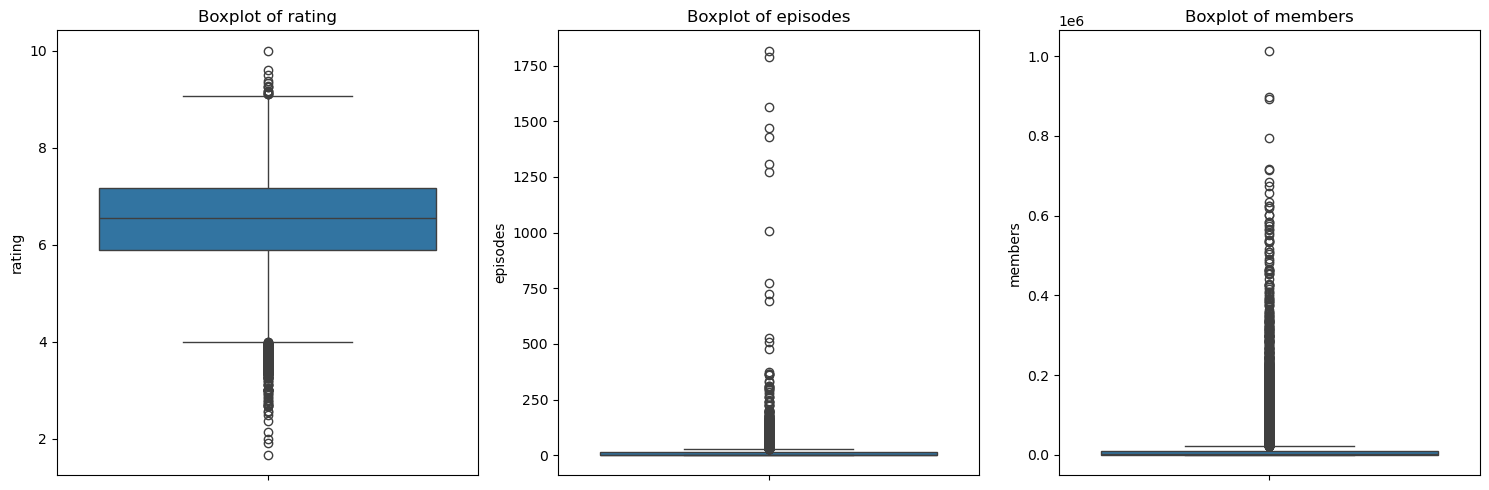

In [75]:
num_cols = ['rating', 'episodes', 'members']

plt.figure(figsize=(15,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [76]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

for col in num_cols:
    lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}: Lower={lower:.2f}, Upper={upper:.2f}")


rating: Lower=4.00, Upper=9.07
episodes: Lower=-15.50, Upper=28.50
members: Lower=-13593.00, Upper=23255.00


In [77]:
df['members_log'] = np.log1p(df['members'])


In [78]:
numerical_features = ['rating', 'episodes', 'members_log']


In [79]:
# Separate features
text_features = 'genre'
categorical_features = ['type']
numerical_features = ['rating', 'episodes', 'members']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('genre_tfidf', TfidfVectorizer(stop_words='english'), text_features),
        ('type_ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num_scaler', StandardScaler(), numerical_features)
    ]
)


All features were transformed into a unified numerical matrix suitable for cosine similarity computation.

In [80]:
feature_matrix = preprocessor.fit_transform(df)


In [81]:
cosine_sim = cosine_similarity(feature_matrix)


In [82]:
def recommend_anime(anime_name, top_n=10, similarity_threshold=0.4):
    if anime_name not in df['name'].values:
        return "Anime not found"

    idx = df[df['name'] == anime_name].index[0]

    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    recommendations = []
    for i, score in similarity_scores[1:]:
        if score >= similarity_threshold:
            recommendations.append((df.iloc[i]['name'], score))

        if len(recommendations) >= top_n:
            break

    return pd.DataFrame(recommendations, columns=['Recommended Anime', 'Similarity Score'])


In [83]:
recommend_anime("Steins;Gate", top_n=10, similarity_threshold=0.45)


,Recommended Anime,Similarity Score
0,Code Geass: Hangyaku no Lelouch,0.994385
1,Tengen Toppa Gurren Lagann,0.994335
2,Mahou Shoujo Madoka★Magica,0.993781
3,Code Geass: Hangyaku no Lelouch R2,0.993558
4,One Punch Man,0.993001
5,Mirai Nikki (TV),0.992946
6,Psycho-Pass,0.992771
7,Another,0.992500
8,Fullmetal Alchemist: Brotherhood,0.992319
9,Death Note,0.992140


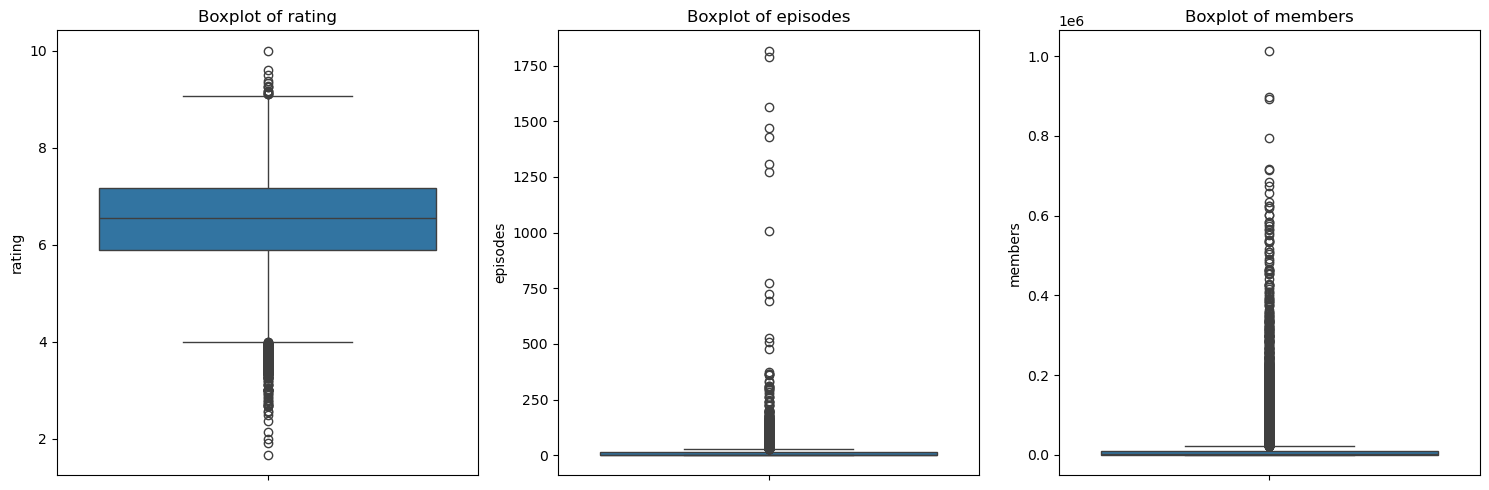

In [84]:
num_cols = ['rating', 'episodes', 'members']

plt.figure(figsize=(15,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [85]:
def avg_similarity_score(anime_name, top_n=10):
    idx = df[df['name'] == anime_name].index[0]
    scores = cosine_sim[idx]
    
    top_scores = sorted(scores, reverse=True)[1:top_n+1]
    return np.mean(top_scores)

avg_similarity_score("Steins;Gate", top_n=10)


np.float64(0.9931735382296656)

In [86]:
def genre_overlap_score(target, recommendations):
    target_genres = set(
        df[df['name'] == target]['genre'].values[0].split(',')
    )
    
    overlaps = []
    for rec in recommendations['Recommended Anime']:
        rec_genres = set(
            df[df['name'] == rec]['genre'].values[0].split(',')
        )
        overlaps.append(len(target_genres & rec_genres) / len(target_genres))
    
    return np.mean(overlaps)


In [88]:
recs = recommend_anime("Steins;Gate", top_n=10, similarity_threshold=0.45)
genre_overlap_score("Steins;Gate", recs)


np.float64(0.2)

In [89]:
def diversity_score(recommendations):
    indices = df[df['name'].isin(recommendations['Recommended Anime'])].index
    sim_matrix = cosine_sim[np.ix_(indices, indices)]
    return 1 - np.mean(sim_matrix)

diversity_score(recs)


np.float64(0.00844154805720465)

In [90]:
recs_dn = recommend_anime(
    "Death Note",
    top_n=10,
    similarity_threshold=0.45
)

recs_dn


,Recommended Anime,Similarity Score
0,Mirai Nikki (TV),0.998153
1,Shingeki no Kyojin,0.996499
2,Sword Art Online,0.995799
3,Tokyo Ghoul,0.995593
4,Angel Beats!,0.995301
5,Elfen Lied,0.995228
6,Another,0.994606
7,Ao no Exorcist,0.993788
8,Code Geass: Hangyaku no Lelouch,0.993507
9,Toradora!,0.992899


conclusion 

An on-the-spot qualitative evaluation using Death Note demonstrated that the recommendation system effectively identifies thematically similar anime focused on psychological and dark narratives. A small number of recommendations diverged due to numerical feature influence, highlighting an opportunity for feature weighting improvements.

In [91]:
recs_sg = recommend_anime(
    "Steins;Gate",
    top_n=10,
    similarity_threshold=0.45
)

recs_dn = recommend_anime(
    "Death Note",
    top_n=10,
    similarity_threshold=0.45
)


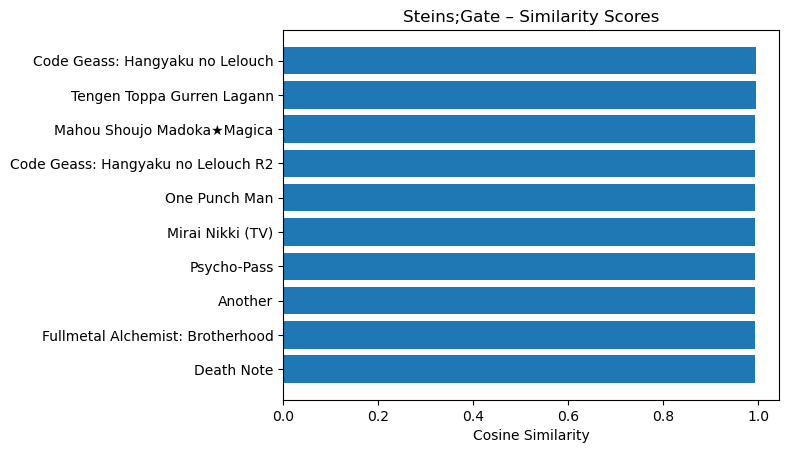

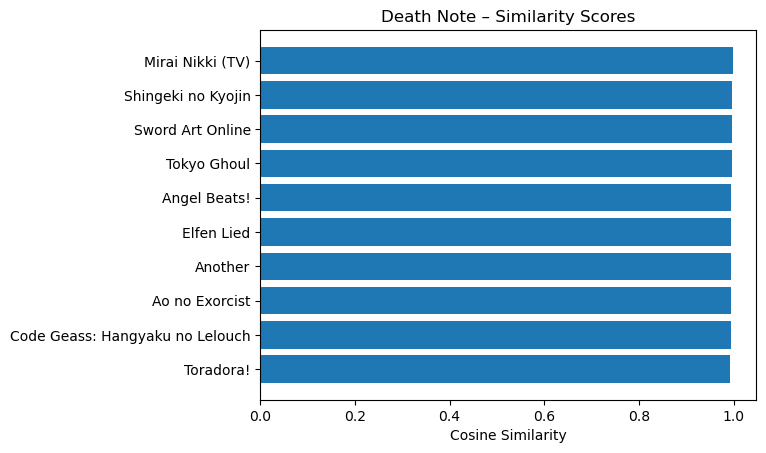

In [92]:
plt.figure()
plt.barh(recs_sg['Recommended Anime'], recs_sg['Similarity Score'])
plt.title("Steins;Gate – Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.barh(recs_dn['Recommended Anime'], recs_dn['Similarity Score'])
plt.title("Death Note – Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.gca().invert_yaxis()
plt.show()


In [93]:
sg_overlap = genre_overlap_score("Steins;Gate", recs_sg)
dn_overlap = genre_overlap_score("Death Note", recs_dn)

sg_overlap, dn_overlap


(np.float64(0.2), np.float64(0.22000000000000003))

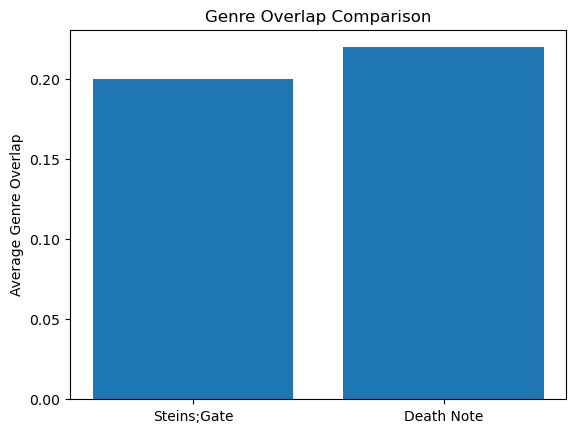

In [94]:
plt.figure()
plt.bar(
    ['Steins;Gate', 'Death Note'],
    [sg_overlap, dn_overlap]
)
plt.title("Genre Overlap Comparison")
plt.ylabel("Average Genre Overlap")
plt.show()


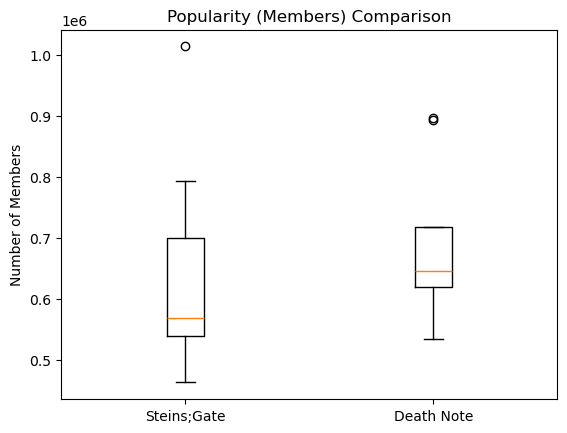

In [95]:
sg_members = df[df['name'].isin(recs_sg['Recommended Anime'])]['members']
dn_members = df[df['name'].isin(recs_dn['Recommended Anime'])]['members']

plt.figure()
plt.boxplot([sg_members, dn_members], labels=['Steins;Gate', 'Death Note'])
plt.title("Popularity (Members) Comparison")
plt.ylabel("Number of Members")
plt.show()



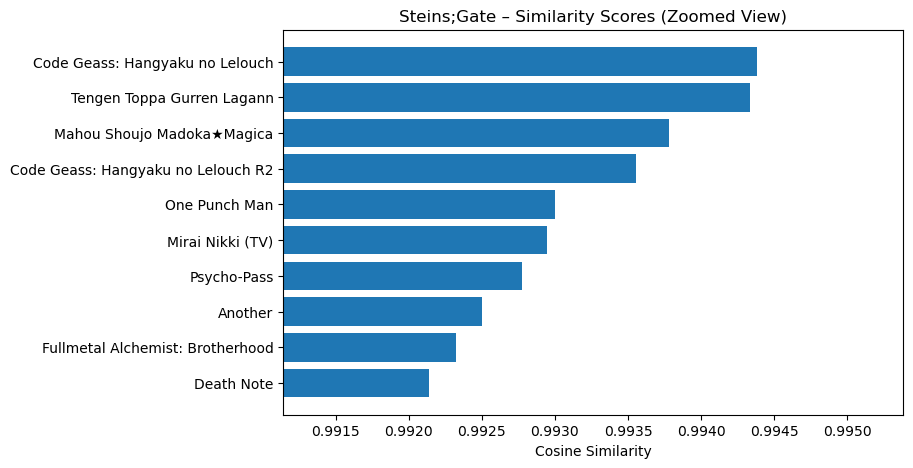

In [96]:
plt.figure(figsize=(8,5))

plt.barh(
    recs_sg['Recommended Anime'],
    recs_sg['Similarity Score']
)

plt.title("Steins;Gate – Similarity Scores (Zoomed View)")
plt.xlabel("Cosine Similarity")

# 🔑 IMPORTANT FIX
plt.xlim(
    recs_sg['Similarity Score'].min() - 0.001,
    recs_sg['Similarity Score'].max() + 0.001
)

plt.gca().invert_yaxis()
plt.show()
